Loading all the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

reading the data set spam.csv

In [2]:
# Reading the data
df = pd.read_csv("/content/spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



This code snippet cleans and prepares a DataFrame by removing unnecessary columns named 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4', renaming the columns 'v1' and 'v2' to 'label' and 'Text' respectively, encoding the 'label' column values from 'ham' and 'spam' to 0 and 1, and finally displaying the first few rows of the updated DataFrame.

In [3]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


This line of code calculates the frequency of each unique value in the 'label' column of the DataFrame df and then plots these counts as a bar chart.

<Axes: xlabel='label'>

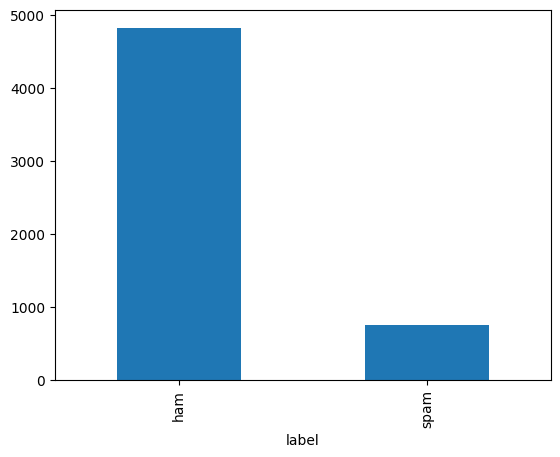

In [4]:

df['label'].value_counts().plot(kind='bar')

This code groups the DataFrame df by the 'label' column, calculates the size of each group, and then plots a horizontal bar chart using the 'Dark2' color palette from Matplotlib. It also hides the top and right spines of the plot to enhance visual clarity.

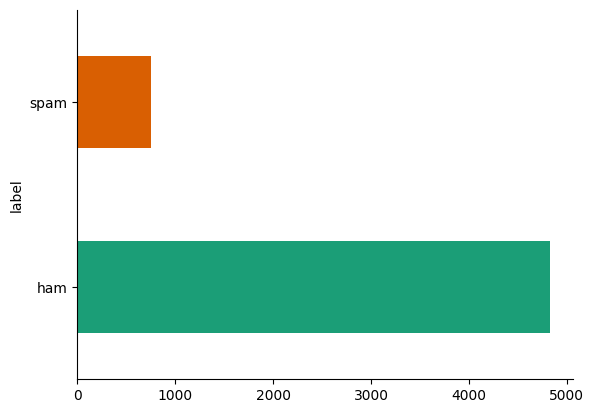

In [5]:

df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

It generates and displays a density plot using these text lengths, color-coded by category, to show variations in text length across different labels.

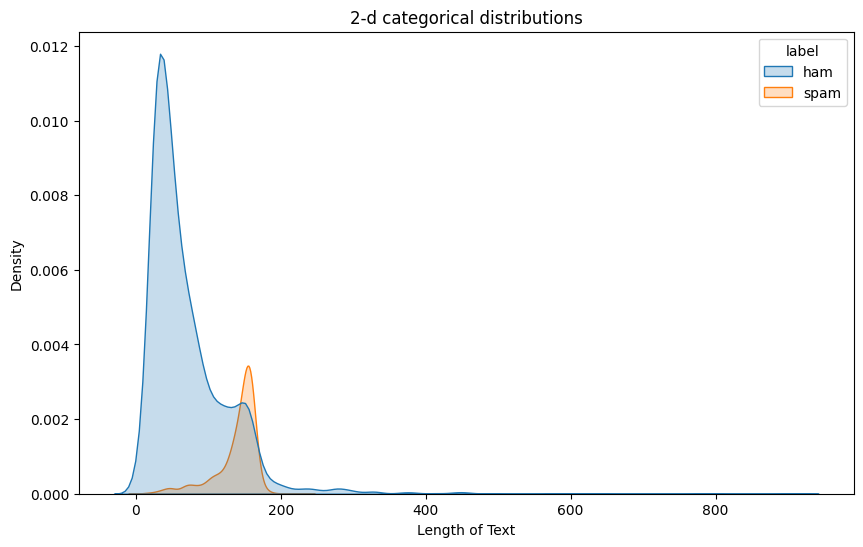

In [9]:


df['text_length'] = df['Text'].apply(len)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='text_length', hue='label', fill=True)
plt.title('2-d categorical distributions')
plt.xlabel('Length of Text')
plt.ylabel('Density')
plt.show()


This code creates and displays a bar plot that shows the frequency of each unique value in the 'label' column of the DataFrame df.

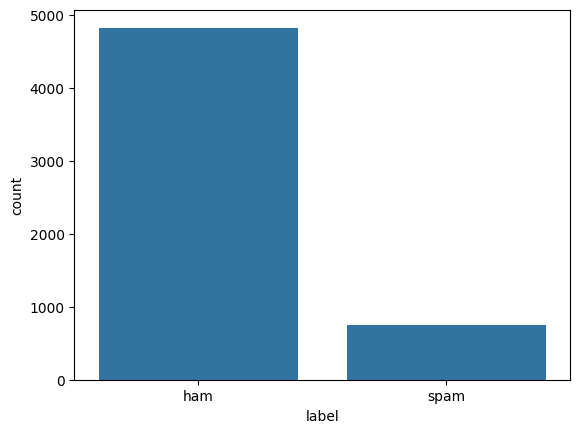

In [10]:
sns.countplot(x=df['label'])
plt.show()

This code calculates the average number of words per text message in the 'Text' column of the DataFrame df and prints the rounded result. It does this by splitting each text into words, counting them, summing these counts across all messages, and then dividing by the total number of messages.**bold text**

In [11]:

avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)

15


This code iterates through each text message in the 'Text' column of the DataFrame df, splits each message into words, and adds these words to a set to ensure all entries are unique. After processing all messages, it calculates and prints the total number of unique words found across all text messages.

In [12]:

s = set()
for sent in df['Text']:
  for word in sent.split():
	  s.add(word)
total_words_length=len(s)
print(total_words_length)


15585


This code converts the 'Text' and 'label_enc' columns of the DataFrame df into numpy arrays, creates a new DataFrame new_df from these arrays, and then splits this new DataFrame into training and testing sets with 20% of the data reserved for testing. It also prints the shapes of the training and testing sets for both features ('Text') and labels.

In [13]:
# Splitting data for Training and testing
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
	new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))


This code sets up text classification using a Naive Bayes model by first converting the text data from the training and testing sets into TF-IDF vectors. It then trains a Multinomial Naive Bayes classifier on the vectorized training data to prepare for making predictions.



In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB()

This line of code calculates the accuracy of the trained Multinomial Naive Bayes model by comparing its predictions on the vectorized test data (X_test_vec) against the actual labels (y_test). It then prints the accuracy score.

In [15]:
accuracy=accuracy_score(y_test,baseline_model.predict(X_test_vec))
print(accuracy)

0.9623318385650225


In [16]:
print(classification_report(y_test,baseline_model.predict(X_test_vec)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115




This code is performing text classification on a spam dataset using a Multinomial Naive Bayes model. It loads the dataset, preprocesses it, splits it into training and testing sets, vectorizes the text data, trains the model, makes predictions, calculates evaluation metrics (accuracy, precision, recall, and F1-score), creates a DataFrame to store the metrics, and finally visualizes the metrics using a bar plot.

In [17]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len

text_vec = TextVectorization(
	max_tokens=MAXTOKENS,
	standardize='lower_and_strip_punctuation',
	output_mode='int',
	output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)

This output shows the result of applying the TextVectorization layer to the sentence "This Is Ai final Project". The layer has converted the sentence into an array of integers, where each integer represents a token in the layer's vocabulary. The sequence is padded to a length of 15, which is the specified output_sequence_length, with zeros filling in the positions where there are no words from the input sentence. Each number corresponds to a unique word, with '1' typically representing a word outside the top most frequent tokens specified by max_tokens, often an out-of-vocabulary token in this context.

In [18]:
#Example
sentence="This Is Ai final Project"
text_vec([sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 41,  10,   1, 587, 676,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

This code initializes an embedding layer for a neural network using TensorFlow's Keras library, which maps each word in a predefined vocabulary of a specific size to a 128-dimensional vector. The layer is configured to handle sequences of a set length and initializes the vectors uniformly. This setup helps in learning dense representations of words, capturing their semantic meanings during model training.

In [19]:
embedding_layer = layers.Embedding(
	input_dim=MAXTOKENS,
	output_dim=128,
	embeddings_initializer='uniform',
	input_length=OUTPUTLEN
)

This code constructs a neural network model using TensorFlow's Keras API, designed for binary classification of text data. The model begins with an input layer that takes in strings, applies a text vectorization layer to convert these strings into integer sequences, and then uses an embedding layer to transform these sequences into dense vectors. It includes a global average pooling layer to reduce the dimensionality, followed by a flattening step and a dense layer with ReLU activation for nonlinear processing. The final output is produced by a dense layer with a sigmoid activation function, ideal for binary classification. The model is compiled with the Adam optimizer, binary crossentropy loss with label smoothing to help prevent overfitting, and it tracks accuracy as a performance metric.

In [20]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)

model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
	label_smoothing=0.5), metrics=['accuracy'])


This line of code displays a summary of the neural network model model_1, providing details about each layer, including their types, shapes, and the number of parameters in the model, which helps in understanding the architecture and parameter count of the network.








In [21]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 15)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 15, 128)           1994880   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128  

This code builds a TensorFlow Keras model for classifying text data. It starts with an input layer that accepts string data, processes it through a text vectorization layer to convert text to integer sequences, then uses an embedding layer to map these sequences to dense vectors. The model incorporates a global average pooling layer to simplify the output from the embedding layer, a flattening step, and a dense layer with ReLU activation for learning nonlinear interactions. It concludes with an output layer using sigmoid activation for binary classification. The model is compiled with the Adam optimizer and binary crossentropy loss with label smoothing to mitigate overfitting, while accuracy is tracked as a performance metric

In [22]:
#############################################################################
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)

model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
	label_smoothing=0.5), metrics=['accuracy'])

This Python script defines three functions for managing a machine learning model using the TensorFlow Keras framework. The compile_model function sets up the model with the Adam optimizer, binary crossentropy loss, and tracks accuracy as a metric. The fit_model function trains the model on provided training data for a specified number of epochs, validating performance on test data. The evaluate_model function assesses the model on given data, calculating and returning metrics like accuracy, precision, recall, and F1-score, summarizing the model's performance in a dictionary format.

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

def compile_model(model):
	'''
	simply compile the model with adam optimzer
	'''
	model.compile(optimizer=keras.optimizers.Adam(),
				loss=keras.losses.BinaryCrossentropy(),
				metrics=['accuracy'])

def fit_model(model, epochs, X_train=X_train, y_train=y_train,
			X_test=X_test, y_test=y_test):
	'''
	fit the model with given epochs, train
	and test data
	'''
	history = model.fit(X_train,
						y_train,
						epochs=epochs,
						validation_data=(X_test, y_test),
						validation_steps=int(0.2*len(X_test)))
	return history

def evaluate_model(model, X, y):
	'''
	evaluate the model and returns accuracy,
	precision, recall and f1-score
	'''
	y_preds = np.round(model.predict(X))
	accuracy = accuracy_score(y, y_preds)
	precision = precision_score(y, y_preds)
	recall = recall_score(y, y_preds)
	f1 = f1_score(y, y_preds)

	model_results_dict = {'accuracy': accuracy,
						'precision': precision,
						'recall': recall,
						'f1-score': f1}

	return model_results_dict

This code constructs a more complex neural network model using TensorFlow's Keras API for text classification. It begins with an input layer for string data, followed by a text vectorization layer to convert text to integer sequences and an embedding layer to map these sequences to dense vectors. Then, it includes two bidirectional LSTM layers with 64 units each, which process the input sequence in both forward and backward directions to capture contextual information. Afterward, it flattens the output, applies dropout regularization, and passes it through a dense layer with ReLU activation. Finally, it ends with an output layer using a sigmoid activation function for binary classification. The model is compiled with the Adam optimizer and binary crossentropy loss and trained for 5 epochs on the provided data.

In [24]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
bi_lstm = layers.Bidirectional(layers.LSTM(
	64, activation='tanh', return_sequences=True))(embedding_layer_model)
lstm = layers.Bidirectional(layers.LSTM(64))(bi_lstm)
flatten = layers.Flatten()(lstm)
dropout = layers.Dropout(.1)(flatten)
x = layers.Dense(32, activation='relu')(dropout)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_2 = keras.Model(input_layer, output_layer)

compile_model(model_2) # compile the model
history_2 = fit_model(model_2, epochs=5) # fit the model

Epoch 1/5
140/140 [==============================] - 27s 133ms/step - loss: 0.1632 - accuracy: 0.9428 - val_loss: 0.0819 - val_accuracy: 0.9767
Epoch 2/5
140/140 [==============================] - 11s 81ms/step - loss: 0.0265 - accuracy: 0.9942 - val_loss: 0.0773 - val_accuracy: 0.9776
Epoch 3/5
140/140 [==============================] - 12s 89ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.1109 - val_accuracy: 0.9749
Epoch 4/5
140/140 [==============================] - 11s 81ms/step - loss: 4.6811e-04 - accuracy: 0.9998 - val_loss: 0.1417 - val_accuracy: 0.9758
Epoch 5/5
140/140 [==============================] - 12s 87ms/step - loss: 5.0805e-05 - accuracy: 1.0000 - val_loss: 0.1506 - val_accuracy: 0.9767


This code utilizes TensorFlow and TensorFlow Hub to create a Sequential model for text classification, incorporating the Universal Sentence Encoder (USE) to embed text inputs into numerical vectors, followed by dropout regularization and two dense layers for classification, ultimately training the model over five epochs.








In [25]:
import tensorflow_hub as hub


model_3 = keras.Sequential()


use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
						trainable=False,
						input_shape=[],
						dtype=tf.string,
						name='USE')
model_3.add(use_layer)
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(64, activation=keras.activations.relu))
model_3.add(layers.Dense(1, activation=keras.activations.sigmoid))

compile_model(model_3)

history_3 = fit_model(model_3, epochs=5)

Epoch 1/5
140/140 [==============================] - 6s 24ms/step - loss: 0.2911 - accuracy: 0.9224 - val_loss: 0.1151 - val_accuracy: 0.9668
Epoch 2/5
140/140 [==============================] - 3s 21ms/step - loss: 0.0812 - accuracy: 0.9785 - val_loss: 0.0705 - val_accuracy: 0.9758
Epoch 3/5
140/140 [==============================] - 5s 36ms/step - loss: 0.0567 - accuracy: 0.9838 - val_loss: 0.0591 - val_accuracy: 0.9803
Epoch 4/5
140/140 [==============================] - 3s 21ms/step - loss: 0.0470 - accuracy: 0.9861 - val_loss: 0.0548 - val_accuracy: 0.9812
Epoch 5/5
140/140 [==============================] - 3s 23ms/step - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0509 - val_accuracy: 0.9821



This code evaluates the performance of multiple models (Multinomial Naive Bayes, Custom Vector Embedding, Bidirectional LSTM, and Transfer Learning with Universal Sentence Encoder) on a test dataset, aggregating the results into a DataFrame for comparison

In [26]:
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
model_1_results = evaluate_model(model_1, X_test, y_test)
model_2_results = evaluate_model(model_2, X_test, y_test)
model_3_results = evaluate_model(model_3, X_test, y_test)

total_results = pd.DataFrame({'MultinomialNB Model':baseline_model_results,
							'Custom-Vec-Embedding Model':model_1_results,
							'Bidirectional-LSTM Model':model_2_results,
							'USE-Transfer learning Model':model_3_results}).transpose()

total_results


35/35 [==============================] - 1s 19ms/step


,accuracy,precision,recall,f1-score
MultinomialNB Model,0.962332,1.000000,0.720000,0.837209
Custom-Vec-Embedding Model,0.904036,0.752941,0.426667,0.544681
Bidirectional-LSTM Model,0.976682,0.936620,0.886667,0.910959
USE-Transfer learning Model,0.982063,0.957746,0.906667,0.931507
